###                                                 ADE.                                 ANALYSIS DATA EXPLORATORY

In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib. pyplot as plt
from scipy.stats import chi2_contingency

In [25]:
#Data collection
df = pd.read_csv("/workspaces/CarlosRestrepo-machine-learning-python/data/raw/internal-link.csv")
df.head()
df.drop('id', axis=1).duplicated().sum()

np.int64(0)

In [26]:
#Remove non-esential colums from the DataFrame.
df = df.drop(['id', 'host_id', 'name', 'host_name', 'neighbourhood', 'last_review'], axis=1)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               38843 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.7+ MB


,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,Brooklyn,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,Manhattan,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [27]:
#Data cleaning
df = df[df['price'] > 0]
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

foo = df['price'].quantile(0.99)


#I created a dictionary with the necessary calculated percentiles for every column needed.
umbral_columns = {'price': df['price'].quantile(0.99), 
                'minimum_nights': df['minimum_nights'].quantile(0.99),
                'number_of_reviews': df['number_of_reviews'].quantile(0.99),
                'reviews_per_month': df['reviews_per_month'].quantile(0.99),
                'calculated_host_listings_count': df['calculated_host_listings_count'].quantile(0.95),
                'availability_365': df['availability_365'].quantile(0.99)
                }
#I combined conditions to accelerate the coding process.
filter_combined_condition = (
                            (df['price'] <= umbral_columns['price']) &
                            (df['minimum_nights'] <= umbral_columns['minimum_nights']) &
                            (df['number_of_reviews'] <= umbral_columns['number_of_reviews']) &
                            (df['reviews_per_month'] <= umbral_columns['reviews_per_month']) &
                            (df['calculated_host_listings_count'] <= umbral_columns['calculated_host_listings_count']) &
                            (df['availability_365'] <= umbral_columns['availability_365'])
                            )
#Apply the filter to the DataFrame
df = df[filter_combined_condition]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44710 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             44710 non-null  object 
 1   latitude                        44710 non-null  float64
 2   longitude                       44710 non-null  float64
 3   room_type                       44710 non-null  object 
 4   price                           44710 non-null  int64  
 5   minimum_nights                  44710 non-null  int64  
 6   number_of_reviews               44710 non-null  int64  
 7   reviews_per_month               44710 non-null  float64
 8   calculated_host_listings_count  44710 non-null  int64  
 9   availability_365                44710 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.8+ MB


/tmp/ipykernel_1075/1050896307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


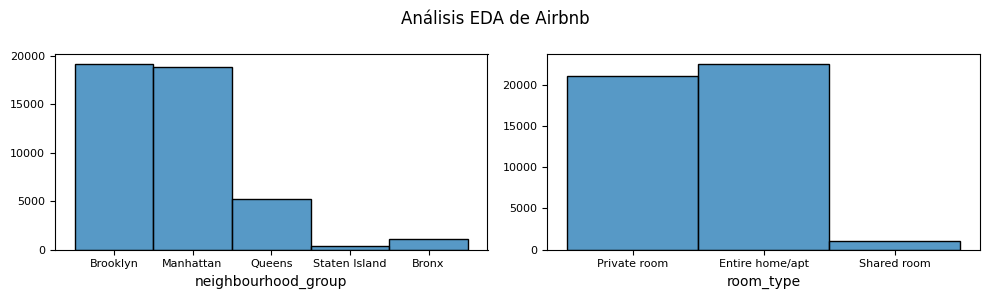

In [28]:
#Categorical Variable Analysis
fig, axis = plt.subplots(1, 2, figsize=(10, 3))
fig.suptitle('Análisis EDA de Airbnb')

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['axes.labelsize'] = 10

sns.histplot(ax=axis[0], data=df, x='neighbourhood_group').set(ylabel=None)
sns.histplot(ax=axis[1], data=df, x='room_type').set(ylabel=None)

# Ajustar el layout
plt.tight_layout()

We can see how brooklyn and manhatas neighbourhood is with difference than rest where more airbnb are concentrated

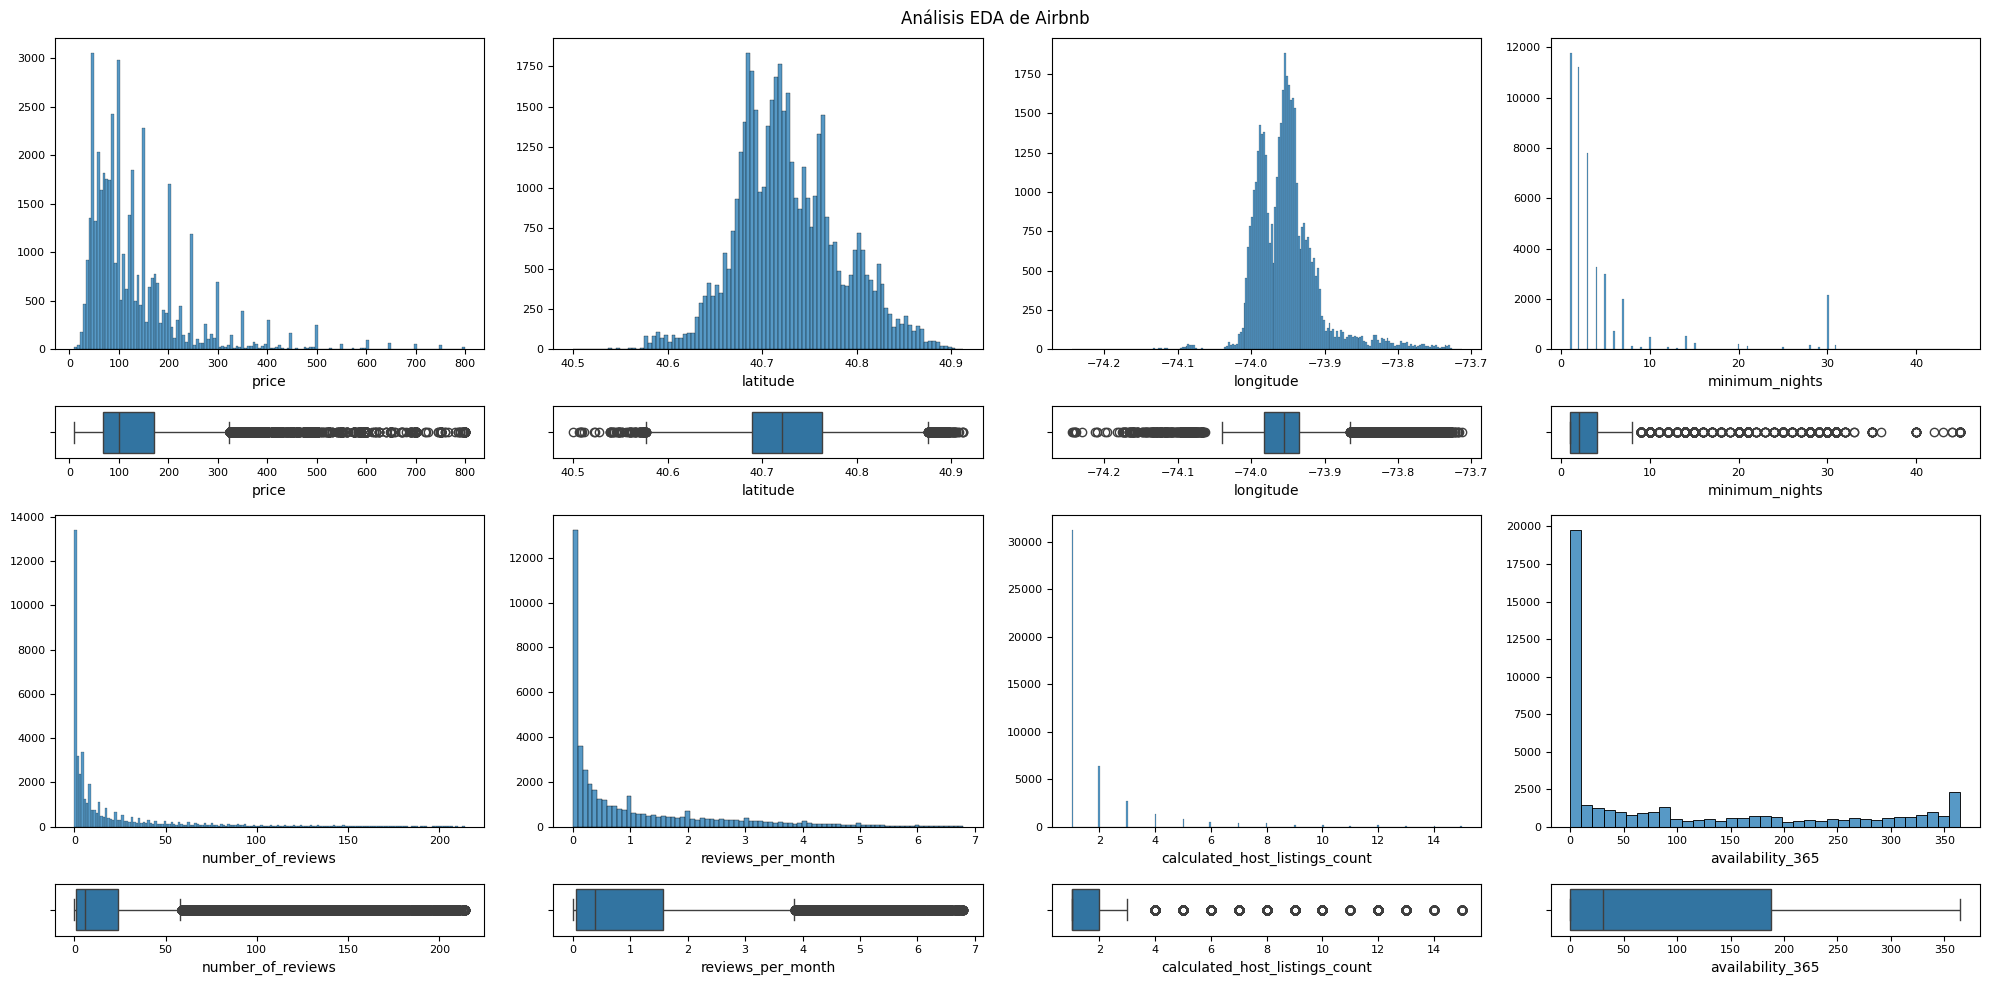

In [29]:
#Numerical Variable Analysis
fig, axis = plt.subplots(4, 4, figsize=(20, 10), gridspec_kw={'height_ratios': [6,1,6,1]})

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['axes.labelsize'] = 10
fig.suptitle('Análisis EDA de Airbnb')

sns.histplot(ax=axis[0, 0], data=df, x='price').set(ylabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x='price')

sns.histplot(ax=axis[0, 1], data=df, x='latitude').set(ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x='latitude')

sns.histplot(ax=axis[0, 2], data=df, x='longitude').set(ylabel=None)
sns.boxplot(ax=axis[1, 2], data=df, x='longitude')

sns.histplot(ax=axis[0, 3], data=df, x='minimum_nights').set(ylabel=None)
sns.boxplot(ax=axis[1, 3], data=df, x='minimum_nights')

sns.histplot(ax=axis[2, 0], data=df, x='number_of_reviews').set(ylabel=None)
sns.boxplot(ax=axis[3, 0], data=df, x='number_of_reviews')


sns.histplot(ax=axis[2, 1], data=df, x='reviews_per_month').set(ylabel=None)
sns.boxplot(ax=axis[3, 1], data=df, x='reviews_per_month')

sns.histplot(ax=axis[2, 2], data=df, x='calculated_host_listings_count').set(ylabel=None)
sns.boxplot(ax=axis[3, 2], data=df, x='calculated_host_listings_count')

sns.histplot(ax=axis[2, 3], data=df, x='availability_365').set(ylabel=None)
sns.boxplot(ax=axis[3, 3], data=df, x='availability_365')

plt.tight_layout()

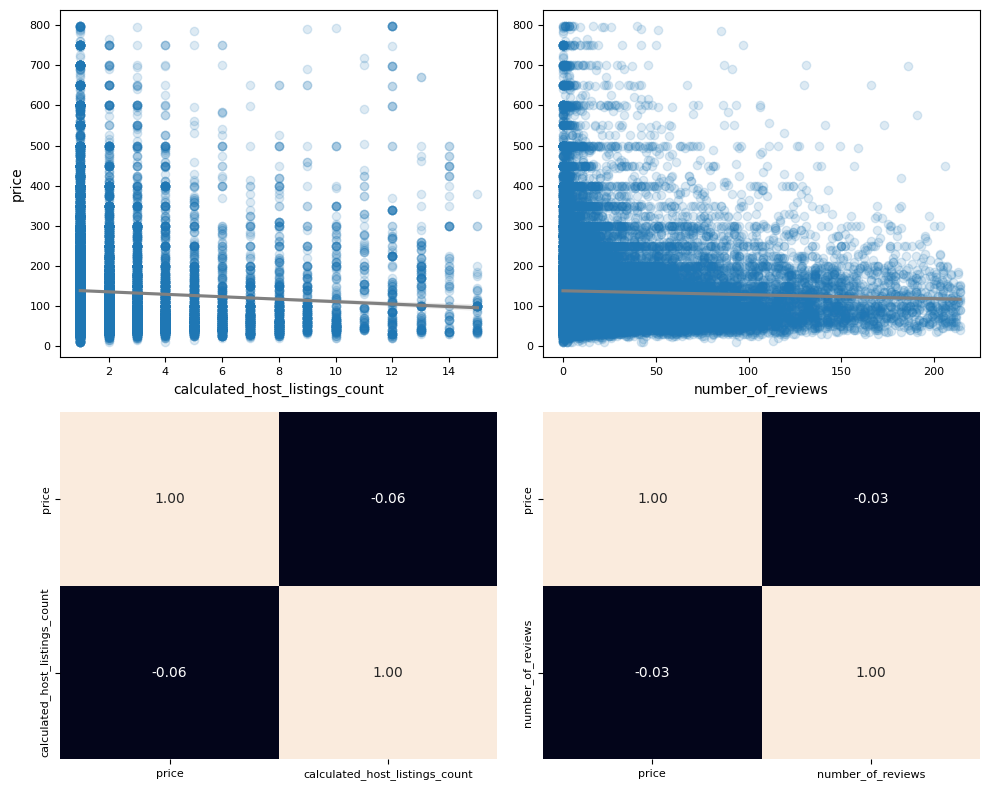

In [30]:
#Multivariate Analysis
fig, axis = plt.subplots(2, 2, figsize=(10, 8))

#Correlation of price vs calculated host listings count
sns.regplot(ax=axis[0, 0], data=df, x='calculated_host_listings_count', y='price',
            scatter_kws={'alpha': 0.15}, line_kws={'color': 'grey'}) 
sns.heatmap(ax=axis[1, 0], data=df[['price', 'calculated_host_listings_count']].corr(), annot=True, fmt='.2f', cbar=False)

#Correlation of price vs. Number of Reviews
sns.regplot(ax=axis[0, 1], data=df, x='number_of_reviews', y='price',
            scatter_kws={'alpha': 0.15}, line_kws={'color': 'grey'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 1], data=df[['price', 'number_of_reviews']].corr(), annot=True, fmt='.2f', cbar=False)

plt.tight_layout()

OBSERVACIÓN:

En los gráficos de dispersión, la línea de regresión es prácticamente horizontal, lo que confirma la ausencia de una relación lineal clara entre el precio y el número de listados y reseñas.

Correlación Precio vs. Listados: El coeficiente es de -0.06. Esto indica una relación inversa casi inexistente; un aumento en el número de listados por anfitrión no se traduce en una disminución significativa del precio.

Correlación Precio vs. Reseñas: El precio del Airbnb no está fuertemente ligado a la cantidad de reseñas.

<Axes: >

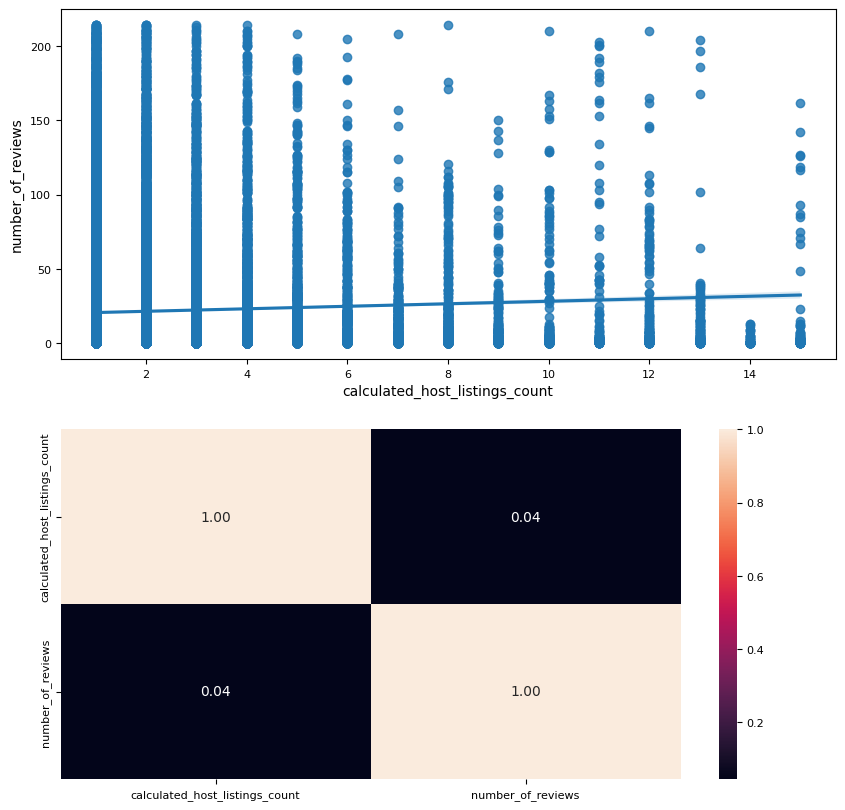

In [31]:
fig, axis = plt.subplots(2, 1, figsize=(10,10))
sns.regplot(ax=axis[0], data=df, x='calculated_host_listings_count', y='number_of_reviews')
sns.heatmap(ax=axis[1], data=df[['calculated_host_listings_count', 'number_of_reviews']].corr(), annot=True, fmt='.2f')

OBSERVACION:

Existe una correlación extremadamente baja (cercana a cero) entre el número de reseñas y la cantidad de listados de Airbnb que tiene un anfitrión.

<Axes: xlabel='room_type', ylabel='count'>

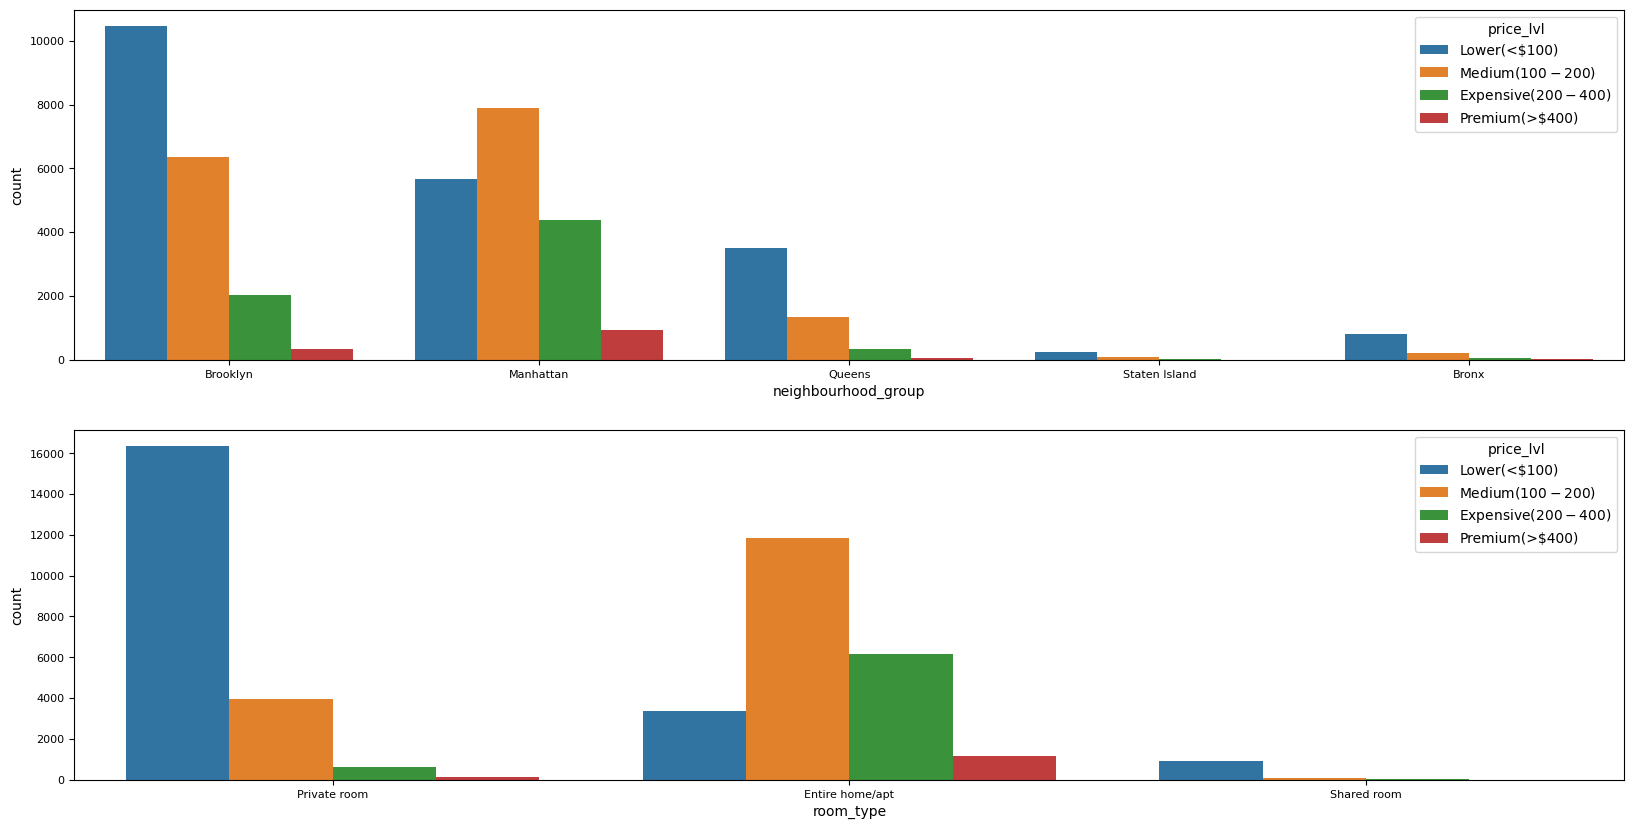

In [32]:
# Categorical-Categorical Analysis
bins = [df['price'].min(), 100, 200, 400, df['price'].max()]
labels = ['Lower(<$100)', 'Medium($100-$200)', 'Expensive($200-$400)', 'Premium(>$400)']
df['price_lvl'] = pd.cut(df['price'], 
                           bins=bins, 
                           labels=labels, 
                           right=False, 
                           include_lowest=True
                           )
fig, axis = plt.subplots(2,1, figsize=(20,10))

sns.countplot(df, x='neighbourhood_group', hue='price_lvl', ax=axis[0])
sns.countplot(df, x='room_type', hue='price_lvl', ax=axis[1])

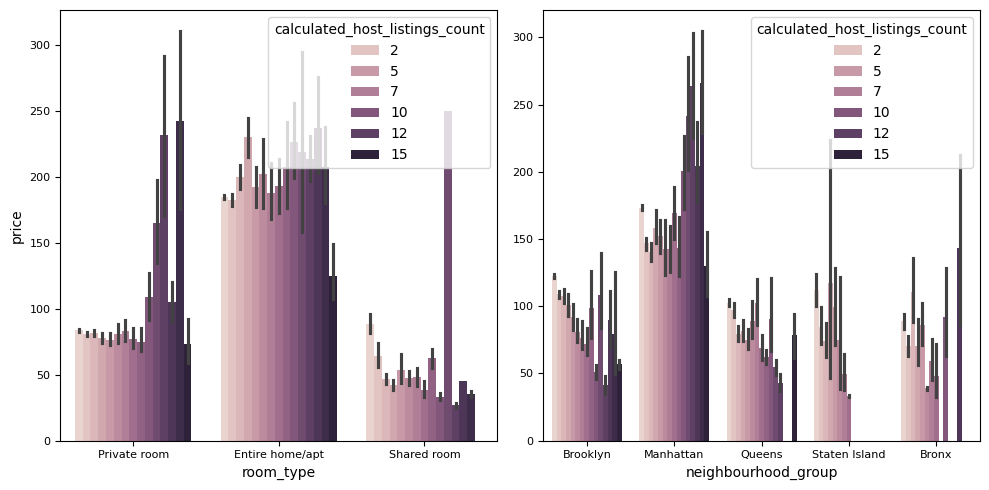

In [33]:
#Class Combinations with Multiple Predictors
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(df, x='room_type', y='price', ax=axis[0], hue='calculated_host_listings_count')
sns.barplot(df, x='neighbourhood_group', y ='price', ax=axis[1], hue='calculated_host_listings_count').set(ylabel=None)

plt.tight_layout()

OBSERVACIÓN: Se observa que existe una correlación directa entre la escala de operación del anfitrión (medida por calculated_host_listings_count) y el precio promedio del alojamiento. Los precios medios más elevados tienden a concentrarse en los hues que representan un mayor número de listados (12 a 15), independientemente del room_type. Esto sugiere que los anfitriones con una mayor cantidad de propiedades bajo gestión establecen precios más altos en promedio.